In [2]:
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

In [3]:
################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

In [4]:
################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()

In [4]:
K = np.matrix([[0,1j,-1j,1j,0,0,-1j,0,0],[-1j,0,1j,0,1j,0,0,-1j,0],[1j,-1j,0,0,0,1j,0,0,-1j],\
               [-1j,0,0,0,1j,-1j,1j,0,0],[0,-1j,0,-1j,0,1j,0,1j,0],[0,0,-1j,1j,-1j,0,0,0,1j],\
               [1j,0,0,-1j,0,0,0,1j,-1j],[0,1j,0,0,-1j,0,-1j,0,1j],[0,0,1j,0,0,-1j,1j,-1j,0]]); matrix(K)

[   0.0  1.0*I -1.0*I  1.0*I    0.0    0.0 -1.0*I    0.0    0.0]
[-1.0*I    0.0  1.0*I    0.0  1.0*I    0.0    0.0 -1.0*I    0.0]
[ 1.0*I -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0 -1.0*I]
[-1.0*I    0.0    0.0    0.0  1.0*I -1.0*I  1.0*I    0.0    0.0]
[   0.0 -1.0*I    0.0 -1.0*I    0.0  1.0*I    0.0  1.0*I    0.0]
[   0.0    0.0 -1.0*I  1.0*I -1.0*I    0.0    0.0    0.0  1.0*I]
[ 1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I -1.0*I]
[   0.0  1.0*I    0.0    0.0 -1.0*I    0.0 -1.0*I    0.0  1.0*I]
[   0.0    0.0  1.0*I    0.0    0.0 -1.0*I  1.0*I -1.0*I    0.0]

In [5]:
transfer(K,2*np.pi/sqrt(27))[0][4]
# 1 - 1.11022302 × 10-16 i

-(0.055555555555555566 - 0.0962250448649376*I)*e^(2.418328211563343*I*sqrt(3)) - (0.11111111111111117 + 0.19245008972987518*I)*e^(1.2091641057816715*I*sqrt(3)) - (0.11111111111111126 - 0.19245008972987532*I)*e^(-1.2091641057816715*I*sqrt(3)) - (0.05555555555555555 + 0.09622504486493767*I)*e^(-2.418328211563343*I*sqrt(3)) + 0.33333333333333354 + 4.43818590603472e-18*I

In [6]:
EK, lK = idempotents(K)
for i in range(len(lK)):
    print("Idempotent for", lK[i])
    print(EK[i].round(3))

Idempotent for -3.464
[           0.111 -0.056 - 0.096*I -0.056 + 0.096*I -0.056 - 0.096*I -0.056 + 0.096*I            0.111 -0.056 + 0.096*I            0.111 -0.056 - 0.096*I]
[-0.056 + 0.096*I            0.111 -0.056 - 0.096*I            0.111 -0.056 - 0.096*I -0.056 + 0.096*I -0.056 - 0.096*I -0.056 + 0.096*I            0.111]
[-0.056 - 0.096*I -0.056 + 0.096*I            0.111 -0.056 + 0.096*I            0.111 -0.056 - 0.096*I            0.111 -0.056 - 0.096*I -0.056 + 0.096*I]
[-0.056 + 0.096*I            0.111 -0.056 - 0.096*I            0.111 -0.056 - 0.096*I -0.056 + 0.096*I -0.056 - 0.096*I -0.056 + 0.096*I            0.111]
[-0.056 - 0.096*I -0.056 + 0.096*I            0.111 -0.056 + 0.096*I            0.111 -0.056 - 0.096*I            0.111 -0.056 - 0.096*I -0.056 + 0.096*I]
[           0.111 -0.056 - 0.096*I -0.056 + 0.096*I -0.056 - 0.096*I -0.056 + 0.096*I            0.111 -0.056 + 0.096*I            0.111 -0.056 - 0.096*I]
[-0.056 - 0.096*I -0.056 + 0.096*I            0.

In [6]:
# Plots absolute value of U(t) for matrix K from time 0 to 3pi
# PH00 = plot(transfer_at_time_a(K,x,0,0),0,3*np.pi)
# PH10 = plot(transfer_at_time_a(K,x,1,0),0,3*np.pi)
# PH20 = plot(transfer_at_time_a(K,x,2,0),0,3*np.pi)
# PH30 = plot(transfer_at_time_a(K,x,3,0),0,3*np.pi)
# PH40 = plot(transfer_at_time_a(K,x,4,0),0,3*np.pi)
# PH50 = plot(transfer_at_time_a(K,x,5,0),0,3*np.pi)
# PH60 = plot(transfer_at_time_a(K,x,6,0),0,3*np.pi)
# PH70 = plot(transfer_at_time_a(K,x,7,0),0,3*np.pi)
# PH80 = plot(transfer_at_time_a(K,x,8,0),0,3*np.pi)

# PH01 = plot(transfer_at_time_a(K,x,0,1),0,3*np.pi)
# PH11 = plot(transfer_at_time_a(K,x,1,1),0,3*np.pi)
# PH21 = plot(transfer_at_time_a(K,x,2,1),0,3*np.pi)
# PH31 = plot(transfer_at_time_a(K,x,3,1),0,3*np.pi)
# PH41 = plot(transfer_at_time_a(K,x,4,1),0,3*np.pi)
# PH51 = plot(transfer_at_time_a(K,x,5,1),0,3*np.pi)
# PH61 = plot(transfer_at_time_a(K,x,6,1),0,3*np.pi)
# PH71 = plot(transfer_at_time_a(K,x,7,1),0,3*np.pi)
# PH81 = plot(transfer_at_time_a(K,x,8,1),0,3*np.pi)

# PH02 = plot(transfer_at_time_a(K,x,0,2),0,3*np.pi)
# PH12 = plot(transfer_at_time_a(K,x,1,2),0,3*np.pi)
# PH22 = plot(transfer_at_time_a(K,x,2,2),0,3*np.pi)
# PH32 = plot(transfer_at_time_a(K,x,3,2),0,3*np.pi)
# PH42 = plot(transfer_at_time_a(K,x,4,2),0,3*np.pi)
# PH52 = plot(transfer_at_time_a(K,x,5,2),0,3*np.pi)
# PH62 = plot(transfer_at_time_a(K,x,6,2),0,3*np.pi)
# PH72 = plot(transfer_at_time_a(K,x,7,2),0,3*np.pi)
# PH82 = plot(transfer_at_time_a(K,x,8,2),0,3*np.pi)

# PH03 = plot(transfer_at_time_a(K,x,0,3),0,3*np.pi)
# PH13 = plot(transfer_at_time_a(K,x,1,3),0,3*np.pi)
# PH23 = plot(transfer_at_time_a(K,x,2,3),0,3*np.pi)
# PH33 = plot(transfer_at_time_a(K,x,3,3),0,3*np.pi)
# PH43 = plot(transfer_at_time_a(K,x,4,3),0,3*np.pi)
# PH53 = plot(transfer_at_time_a(K,x,5,3),0,3*np.pi)
# PH63 = plot(transfer_at_time_a(K,x,6,3),0,3*np.pi)
# PH73 = plot(transfer_at_time_a(K,x,7,3),0,3*np.pi)
# PH83 = plot(transfer_at_time_a(K,x,8,3),0,3*np.pi)

# PH04 = plot(transfer_at_time_a(K,x,0,4),0,3*np.pi)
# PH14 = plot(transfer_at_time_a(K,x,1,4),0,3*np.pi)
# PH24 = plot(transfer_at_time_a(K,x,2,4),0,3*np.pi)
# PH34 = plot(transfer_at_time_a(K,x,3,4),0,3*np.pi)
# PH44 = plot(transfer_at_time_a(K,x,4,4),0,3*np.pi)
# PH54 = plot(transfer_at_time_a(K,x,5,4),0,3*np.pi)
# PH64 = plot(transfer_at_time_a(K,x,6,4),0,3*np.pi)
# PH74 = plot(transfer_at_time_a(K,x,7,4),0,3*np.pi)
# PH84 = plot(transfer_at_time_a(K,x,8,4),0,3*np.pi)

# PH05 = plot(transfer_at_time_a(K,x,0,5),0,3*np.pi)
# PH15 = plot(transfer_at_time_a(K,x,1,5),0,3*np.pi)
# PH25 = plot(transfer_at_time_a(K,x,2,5),0,3*np.pi)
# PH35 = plot(transfer_at_time_a(K,x,3,5),0,3*np.pi)
# PH45 = plot(transfer_at_time_a(K,x,4,5),0,3*np.pi)
# PH55 = plot(transfer_at_time_a(K,x,5,5),0,3*np.pi)
# PH65 = plot(transfer_at_time_a(K,x,6,5),0,3*np.pi)
# PH75 = plot(transfer_at_time_a(K,x,7,5),0,3*np.pi)
# PH85 = plot(transfer_at_time_a(K,x,8,5),0,3*np.pi)

# PH06 = plot(transfer_at_time_a(K,x,0,6),0,3*np.pi)
# PH16 = plot(transfer_at_time_a(K,x,1,6),0,3*np.pi)
# PH26 = plot(transfer_at_time_a(K,x,2,6),0,3*np.pi)
# PH36 = plot(transfer_at_time_a(K,x,3,6),0,3*np.pi)
# PH46 = plot(transfer_at_time_a(K,x,4,6),0,3*np.pi)
# PH56 = plot(transfer_at_time_a(K,x,5,6),0,3*np.pi)
# PH66 = plot(transfer_at_time_a(K,x,6,6),0,3*np.pi)
# PH76 = plot(transfer_at_time_a(K,x,7,6),0,3*np.pi)
# PH86 = plot(transfer_at_time_a(K,x,8,6),0,3*np.pi)

# PH07 = plot(transfer_at_time_a(K,x,0,7),0,3*np.pi)
# PH17 = plot(transfer_at_time_a(K,x,1,7),0,3*np.pi)
# PH27 = plot(transfer_at_time_a(K,x,2,7),0,3*np.pi)
# PH37 = plot(transfer_at_time_a(K,x,3,7),0,3*np.pi)
# PH47 = plot(transfer_at_time_a(K,x,4,7),0,3*np.pi)
# PH57 = plot(transfer_at_time_a(K,x,5,7),0,3*np.pi)
# PH67 = plot(transfer_at_time_a(K,x,6,7),0,3*np.pi)
# PH77 = plot(transfer_at_time_a(K,x,7,7),0,3*np.pi)
# PH87 = plot(transfer_at_time_a(K,x,8,7),0,3*np.pi)

# PH08 = plot(transfer_at_time_a(K,x,0,8),0,3*np.pi)
# PH18 = plot(transfer_at_time_a(K,x,1,8),0,3*np.pi)
# PH28 = plot(transfer_at_time_a(K,x,2,8),0,3*np.pi)
# PH38 = plot(transfer_at_time_a(K,x,3,8),0,3*np.pi)
# PH48 = plot(transfer_at_time_a(K,x,4,8),0,3*np.pi)
# PH58 = plot(transfer_at_time_a(K,x,5,8),0,3*np.pi)
# PH68 = plot(transfer_at_time_a(K,x,6,8),0,3*np.pi)
# PH78 = plot(transfer_at_time_a(K,x,7,8),0,3*np.pi)
# PH88 = plot(transfer_at_time_a(K,x,8,8),0,3*np.pi)

In [ ]:
# graphics_array(((PH00,PH01,PH02,PH03,PH04,PH05,PH06,PH07,PH08), \
#                 (PH10,PH11,PH12,PH13,PH14,PH15,PH16,PH17,PH18), \
#                 (PH20,PH21,PH22,PH23,PH24,PH25,PH26,PH27,PH28), \
#                 (PH30,PH31,PH32,PH33,PH34,PH35,PH36,PH37,PH38), \
#                 (PH40,PH41,PH42,PH43,PH44,PH45,PH46,PH47,PH48), \
#                 (PH50,PH51,PH52,PH53,PH54,PH55,PH56,PH57,PH58), \
#                 (PH60,PH61,PH62,PH63,PH64,PH65,PH66,PH67,PH68), \
#                 (PH70,PH71,PH72,PH73,PH74,PH75,PH76,PH77,PH78), \
#                 (PH80,PH81,PH82,PH83,PH84,PH85,PH86,PH87,PH88)))

In [7]:
# graphics_array(((PH00,PH01,PH02),(PH10,PH11,PH12),(PH20,PH21,PH22)))

In [8]:
# PH00

In [9]:
K3 = np.matrix([[0,1j,-1j],[-1j,0,1j],[1j,-1j,0]]); matrix(K3)

[   0.0  1.0*I -1.0*I]
[-1.0*I    0.0  1.0*I]
[ 1.0*I -1.0*I    0.0]

In [10]:
# Plots absolute value of U(t) for matrix H from time 0 to 3pi
PK300 = plot(transfer_at_time_a(K3,x,0,0),0,3*np.pi)
# PK310 = plot(transfer_at_time_a(K3,x,1,0),0,3*np.pi)
# PK320 = plot(transfer_at_time_a(K3,x,2,0),0,3*np.pi)
# PK301 = plot(transfer_at_time_a(K3,x,0,1),0,3*np.pi)
# PK311 = plot(transfer_at_time_a(K3,x,1,1),0,3*np.pi)
# PK321 = plot(transfer_at_time_a(K3,x,2,1),0,3*np.pi)
# PK302 = plot(transfer_at_time_a(K3,x,0,2),0,3*np.pi)
# PK312 = plot(transfer_at_time_a(K3,x,1,2),0,3*np.pi)
# PK322 = plot(transfer_at_time_a(K3,x,2,2),0,3*np.pi)

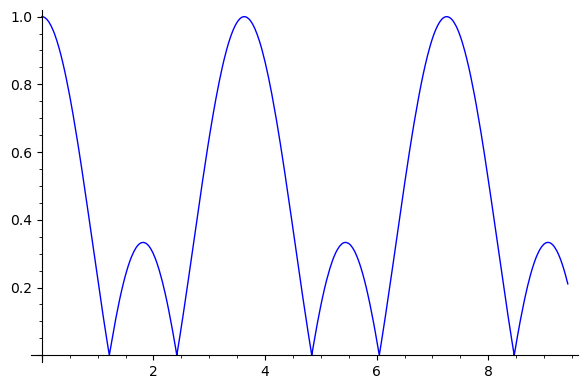

In [11]:
PK300

In [12]:
def H_theta(theta):
    return np.matrix([[0,1,1],[1,0,exp(-1j*theta)],[1,exp(1j*theta),0]])

In [13]:
# Idempotents for H_theta
H = H_theta(np.pi/2)
EH, lH = idempotents(H);
for i in range(len(lH)):
    print("Idempotent for", int(lH[i]))
    print(EH[i].round(3))

Idempotent for -1
[           0.333 -0.289 + 0.167*I -0.289 - 0.167*I]
[-0.289 - 0.167*I            0.333  0.167 + 0.289*I]
[-0.289 + 0.167*I  0.167 - 0.289*I            0.333]
Idempotent for 0
[   0.333 -0.333*I  0.333*I]
[ 0.333*I    0.333   -0.333]
[-0.333*I   -0.333    0.333]
Idempotent for 1
[          0.333 0.289 + 0.167*I 0.289 - 0.167*I]
[0.289 - 0.167*I           0.333 0.167 - 0.289*I]
[0.289 + 0.167*I 0.167 + 0.289*I           0.333]


In [14]:
# Plots absolute value of U(t) for matrix H from time 0 to 3pi
PaH00 = plot(transfer_at_time_a(H,x,0,0),0,3*np.pi)
PaH10 = plot(transfer_at_time_a(H,x,1,0),0,3*np.pi)
PaH20 = plot(transfer_at_time_a(H,x,2,0),0,3*np.pi)
PaH01 = plot(transfer_at_time_a(H,x,0,1),0,3*np.pi)
PaH11 = plot(transfer_at_time_a(H,x,1,1),0,3*np.pi)
PaH21 = plot(transfer_at_time_a(H,x,2,1),0,3*np.pi)
PaH02 = plot(transfer_at_time_a(H,x,0,2),0,3*np.pi)
PaH12 = plot(transfer_at_time_a(H,x,1,2),0,3*np.pi)
PaH22 = plot(transfer_at_time_a(H,x,2,2),0,3*np.pi)

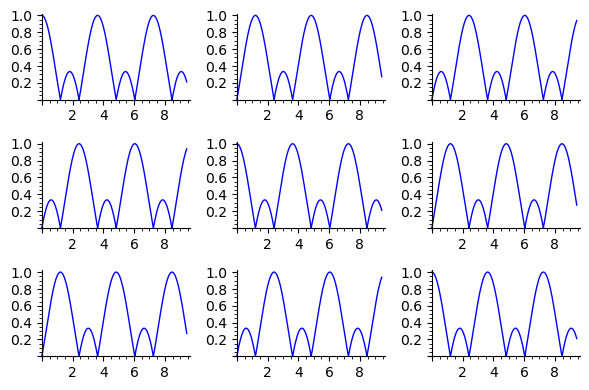

In [15]:
graphics_array(((PaH00,PaH01,PaH02), (PaH10,PaH11,PaH12), (PaH20,PaH21,PaH22)))

In [5]:
K5 = np.matrix([[0,1j,0,0,-1j],[-1j,0,1j,0,0], [0,-1j,0,1j,0],[0,0,-1j,0,1j], [1j,0,0,-1j,0]]); matrix(K5)

[   0.0  1.0*I    0.0    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0    0.0]
[   0.0 -1.0*I    0.0  1.0*I    0.0]
[   0.0    0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0    0.0 -1.0*I    0.0]

In [6]:
transfer(K5,1)

[  0.2237754687845191 + 2.498001805406602e-16*I   0.6121148280502939 - 4.163336342344337e-17*I  0.2239500826560414 + 2.7755575615628914e-17*I  0.48159515793280916 - 2.498001805406602e-16*I -0.5414355374236642 + 1.3183898417423734e-16*I]
[  -0.5414355374236643 - 9.71445146547012e-17*I 0.22377546878451948 - 1.3877787807814457e-16*I   0.6121148280502937 + 4.163336342344337e-17*I 0.22395008265604086 - 1.5265566588595902e-16*I                            0.48159515793280905]
[ 0.4815951579328088 + 2.7755575615628914e-17*I   -0.5414355374236639 + 4.85722573273506e-17*I  0.22377546878451976 - 2.220446049250313e-16*I   0.6121148280502944 - 8.326672684688674e-17*I 0.22395008265604135 - 2.0816681711721685e-16*I]
[0.22395008265604108 - 1.3877787807814457e-17*I 0.48159515793280927 + 1.1102230246251565e-16*I -0.5414355374236643 + 1.0408340855860843e-16*I   0.2237754687845198 - 1.942890293094024e-16*I   0.6121148280502937 - 4.163336342344337e-17*I]
[   0.612114828050294 + 3.608224830031759e-16*I  0.2

In [7]:
transfer_at_time_a(K5,2*np.pi,0,0)

0.7058889867228861

In [13]:
PK500a = plot(transfer_at_time_a(K5,x,0,0),0,3*np.pi)

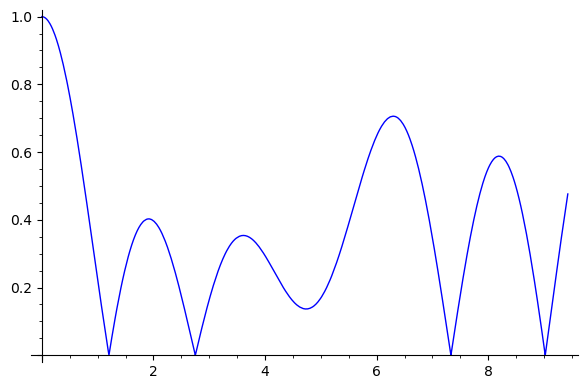

In [14]:
PK500a

In [17]:
f = lambda x: transfer_at_time_a(K5,x,0,0)
find_local_maximum(f, 0, 3*np.pi)

(0.7060142807817678, 6.2963861700088435)

In [11]:
f(0.40279537000350996)

0.8442003060088084